# Laplacian

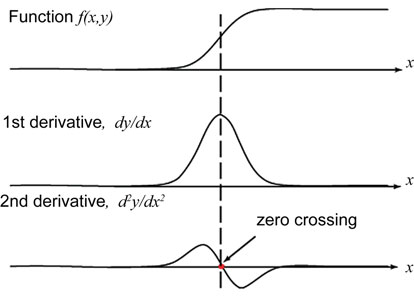

$$Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}}$$

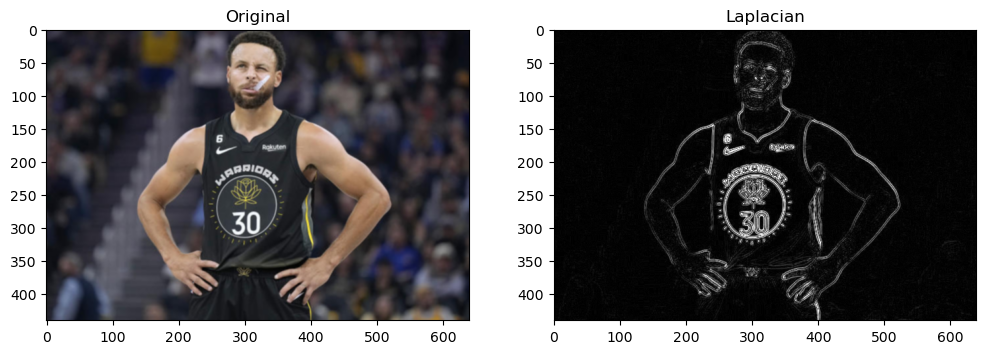

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src = cv2.imread("images/stephen-curry.jpg") 

# Remove noise by blurring with a Gaussian filter
src = cv2.GaussianBlur(src, (3, 3), 0)

src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dst = cv2.Laplacian(src_gray, cv2.CV_16S, ksize=3)

abs_dst = cv2.convertScaleAbs(dst)


plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(src[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(abs_dst, cmap='gray');plt.title("Laplacian");

https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

# Canny

Canny is an algorithm not just a filter

Text(0.5, 1.0, 'White Image')

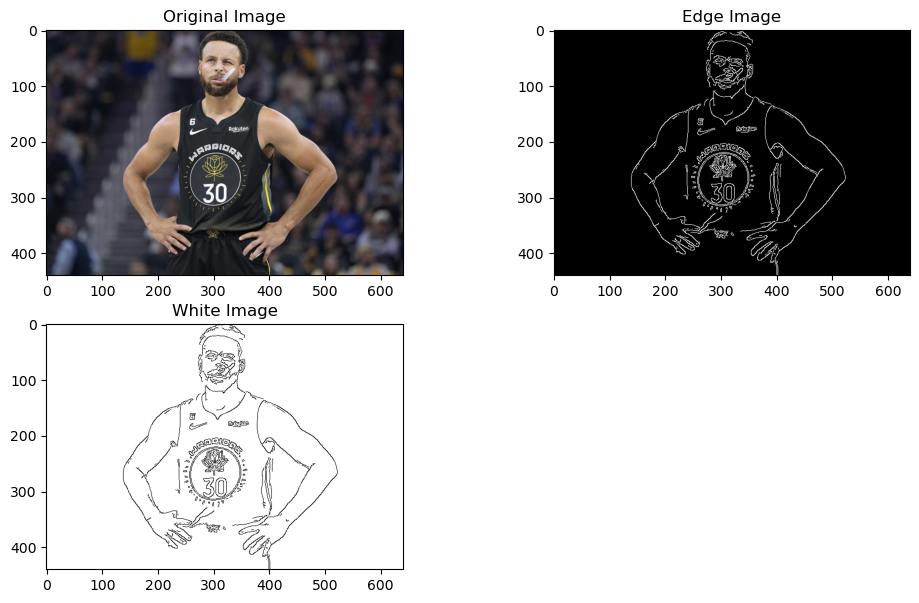

In [3]:
plt.figure(figsize=[12,7])
src = cv2.imread("images/stephen-curry.jpg") 

edge = cv2.Canny(src,100,200)
W_edge = 255-edge
plt.subplot(221),plt.imshow(src[...,::-1]);plt.title('Original Image')
plt.subplot(222),plt.imshow(edge,cmap = 'gray');plt.title('Edge Image')
plt.subplot(223),plt.imshow(W_edge,cmap = 'gray');plt.title('White Image')

In [ ]:
max_low_Threshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv2.GaussianBlur(src_gray, (3,3), 0)
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv2.imshow(window_name, dst)
    
src = cv2.imread("images/stephen-curry.jpg")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cv2.namedWindow(window_name, cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar(title_trackbar, window_name , 0, max_low_Threshold, CannyThreshold)
CannyThreshold(0)
cv2.waitKey()
cv2.destroyAllWindows()

https://docs.opencv.org/4.x/da/d5c/tutorial_canny_detector.html